<a href="https://colab.research.google.com/github/Nikkuchan/CpE-AIML/blob/main/58026_LabNo2_Wagler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Review**




###**Importing of dataset**


In [ ]:
# !pip install tensorflow
# !pip install tensorflow-gpu
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
iris = pd.read_csv("/content/bezdekIris.data")

In [ ]:
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'category']

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,category
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


###**Descriptive Analytics**





In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.054362,3.773826,1.206040
std,0.828594,0.435810,1.760543,0.760354
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


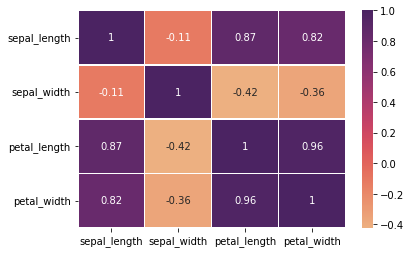

In [ ]:
plt.figure
sns.heatmap(iris.corr(),annot=True, cmap = "flare",linewidths=.4) 
plt.show()

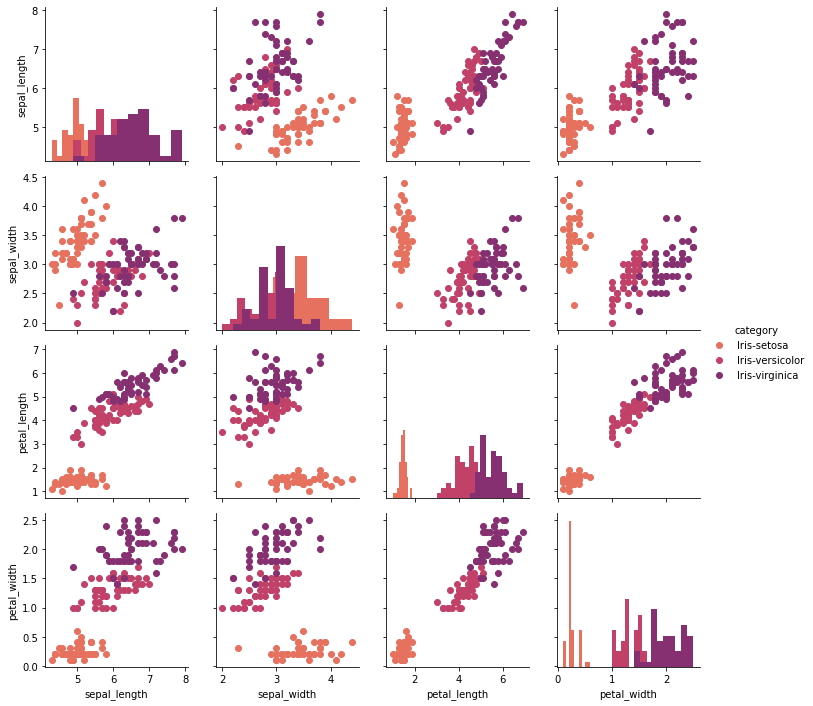

In [ ]:
GridPlot= sns.PairGrid(iris, hue="category", palette='flare')
GridPlot.map_diag(plt.hist)
GridPlot.map_offdiag(plt.scatter)
GridPlot.add_legend()

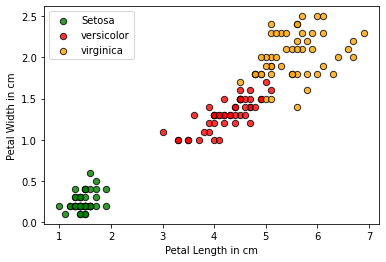

In [ ]:
#petal
petal = iris[iris.category=='Iris-setosa'].plot.scatter(x='petal_length',y='petal_width',color='green', label='Setosa',edgecolor='black', s=40,alpha=0.8)
iris[iris.category=='Iris-versicolor'].plot.scatter(x='petal_length',y='petal_width',color='red', label='versicolor',ax=petal,edgecolor='black',s=40, alpha=0.8)
iris[iris.category=='Iris-virginica'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='virginica', ax=petal,edgecolor='black',s=40, alpha=0.8)
petal.set_xlabel("Petal Length in cm")
petal.set_ylabel("Petal Width in cm")
petal=plt.gcf()
plt.show()

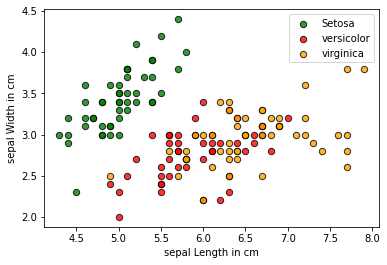

In [ ]:
#sepal comparison
sepal = iris[iris.category=='Iris-setosa'].plot.scatter(x='sepal_length',y='sepal_width',color='green', label='Setosa',edgecolor='black', s=40,alpha=0.8)
iris[iris.category=='Iris-versicolor'].plot.scatter(x='sepal_length',y='sepal_width',color='red', label='versicolor',ax=sepal,edgecolor='black',s=40, alpha=0.8)
iris[iris.category=='Iris-virginica'].plot.scatter(x='sepal_length',y='sepal_width',color='orange', label='virginica', ax=sepal,edgecolor='black',s=40, alpha=0.8)
sepal.set_xlabel("sepal Length in cm")
sepal.set_ylabel("sepal Width in cm")
sepal=plt.gcf()
plt.show()

##**Data Preprocessing**

In [ ]:
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

# converting targets into numerical value
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

# splitting the data into training and test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [ ]:
iris

,sepal_length,sepal_width,petal_length,petal_width,category
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


### *Legend*
0 = setosa 1 = versicolor 2 = virginica

## **Model Training**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

In [ ]:
model1 = tf.keras.Sequential()

model1.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model1.add(tf.keras.layers.Dense(8,activation='tanh'))
model1.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model1.compile(SGD(learning_rate=0.01),'categorical_crossentropy',metrics=['accuracy'])

model1.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_312 (Dense)           (None, 4)                 20        
                                                                 
 dense_313 (Dense)           (None, 8)                 40        
                                                                 
 dense_314 (Dense)           (None, 3)                 27        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 1.1136 - accuracy: 0.3697
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1174 - accuracy: 0.2857
Epoch 3/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1107 - accuracy: 0.2773
Epoch 4/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1029 - accuracy: 0.3025
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 1.0790 - accuracy: 0.3613
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 1.0475 - accuracy: 0.5126
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.9909 - accuracy: 0.5210
Epoch 8/50
119/119 [==============================] - 0s 1ms/step - loss: 0.9089 - accuracy: 0.5882
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 0.7531 - accuracy: 0.6303
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6387

In [ ]:
model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model2.add(tf.keras.layers.Dense(8,activation='tanh'))
model2.add(tf.keras.layers.Dense(6,activation='relu'))
model2.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model2.compile(SGD(learning_rate=0.02),'categorical_crossentropy',metrics=['accuracy'])

model2.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_269 (Dense)           (None, 4)                 20        
                                                                 
 dense_270 (Dense)           (None, 8)                 40        
                                                                 
 dense_271 (Dense)           (None, 6)                 54        
                                                                 
 dense_272 (Dense)           (None, 3)                 21        
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 0.7997 - accuracy: 0.6218
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5161 - accuracy: 0.7647
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.8067
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8319
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8067
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8487
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8235
Epoch 8/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8739
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8235
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8655

In [ ]:
model3 = tf.keras.Sequential()

model3.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model3.add(tf.keras.layers.Dense(9,activation='tanh'))
model3.add(tf.keras.layers.Dense(10,activation='relu'))
model3.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model3.compile(SGD(learning_rate=0.03),'categorical_crossentropy',metrics=['accuracy'])

model3.summary()

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_273 (Dense)           (None, 4)                 20        
                                                                 
 dense_274 (Dense)           (None, 9)                 45        
                                                                 
 dense_275 (Dense)           (None, 10)                100       
                                                                 
 dense_276 (Dense)           (None, 3)                 33        
                                                                 
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 2ms/step - loss: 0.6400 - accuracy: 0.7227
Epoch 2/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7479
Epoch 3/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7563
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.7647
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7815
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3686 - accuracy: 0.8235
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4634 - accuracy: 0.7647
Epoch 8/50
119/119 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8571
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7983
Epoch 10/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8319

In [ ]:
model4 = tf.keras.Sequential()

model4.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model4.add(tf.keras.layers.Dense(7,activation='tanh'))
model4.add(tf.keras.layers.Dense(12,activation='relu'))
model4.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model4.compile(SGD(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model4.summary()

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_277 (Dense)           (None, 4)                 20        
                                                                 
 dense_278 (Dense)           (None, 7)                 35        
                                                                 
 dense_279 (Dense)           (None, 12)                96        
                                                                 
 dense_280 (Dense)           (None, 3)                 39        
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history4 = model4.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 1.0433 - accuracy: 0.4538
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.6555
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5632 - accuracy: 0.7059
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.6891
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 0.6126 - accuracy: 0.6134
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 0.6503 - accuracy: 0.6387
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 0.5553 - accuracy: 0.6050
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 0.5250 - accuracy: 0.6639
Epoch 9/50
119/119 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.6471
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.6639

In [ ]:
model5 = tf.keras.Sequential()

model5.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model5.add(tf.keras.layers.Dense(5,activation='relu'))
model5.add(tf.keras.layers.Dense(15,activation='sigmoid'))
model5.add(tf.keras.layers.Dense(20,activation='relu'))
model5.add(tf.keras.layers.Dense(8,activation='relu'))
model5.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model5.compile(SGD(learning_rate=0.05),'categorical_crossentropy',metrics=['accuracy'])

model5.summary()

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_281 (Dense)           (None, 4)                 20        
                                                                 
 dense_282 (Dense)           (None, 5)                 25        
                                                                 
 dense_283 (Dense)           (None, 15)                90        
                                                                 
 dense_284 (Dense)           (None, 20)                320       
                                                                 
 dense_285 (Dense)           (None, 8)                 168       
                                                                 
 dense_286 (Dense)           (None, 3)                 27        
                                                                 
Total params: 650
Trainable params: 650
Non-trainable

In [ ]:
history5 = model5.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 1.1128 - accuracy: 0.2605
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1080 - accuracy: 0.2941
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1132 - accuracy: 0.2101
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 1.0986 - accuracy: 0.3697
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1130 - accuracy: 0.3277
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1111 - accuracy: 0.2773
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1036 - accuracy: 0.3361
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1142 - accuracy: 0.3109
Epoch 9/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1115 - accuracy: 0.2689
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1127 - accuracy: 0.3445

In [ ]:
model6 = tf.keras.Sequential()

model6.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model6.add(tf.keras.layers.Dense(5,activation='tanh'))
model6.add(tf.keras.layers.Dense(15,activation='relu'))
model6.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model6.compile(SGD(learning_rate=0.06),'categorical_crossentropy',metrics=['accuracy'])

model6.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 4)                 20        
                                                                 
 dense_288 (Dense)           (None, 5)                 25        
                                                                 
 dense_289 (Dense)           (None, 15)                90        
                                                                 
 dense_290 (Dense)           (None, 3)                 48        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history6 = model6.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 0.9277 - accuracy: 0.5210
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5314 - accuracy: 0.7143
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.6639
Epoch 4/50
119/119 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.6639
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7983
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 0.6488 - accuracy: 0.6303
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4385 - accuracy: 0.7815
Epoch 8/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7143
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.7395
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.6891

In [ ]:
model7 = tf.keras.Sequential()

model7.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model7.add(tf.keras.layers.Dense(5,activation='tanh'))
model7.add(tf.keras.layers.Dense(15,activation='relu'))
model7.add(tf.keras.layers.Dense(11,activation='relu'))
model7.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model7.compile(SGD(learning_rate=0.07),'categorical_crossentropy',metrics=['accuracy'])

model7.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_291 (Dense)           (None, 4)                 20        
                                                                 
 dense_292 (Dense)           (None, 5)                 25        
                                                                 
 dense_293 (Dense)           (None, 15)                90        
                                                                 
 dense_294 (Dense)           (None, 11)                176       
                                                                 
 dense_295 (Dense)           (None, 3)                 36        
                                                                 
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history7 = model7.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 0.9964 - accuracy: 0.5042
Epoch 2/50
119/119 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.6471
Epoch 3/50
119/119 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.6218
Epoch 4/50
119/119 [==============================] - 0s 1ms/step - loss: 0.7318 - accuracy: 0.5546
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1270 - accuracy: 0.3193
Epoch 6/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1139 - accuracy: 0.2941
Epoch 7/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1161 - accuracy: 0.3025
Epoch 8/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1168 - accuracy: 0.3025
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1171 - accuracy: 0.3193
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1157 - accuracy: 0.3529

In [ ]:
model8 = tf.keras.Sequential()

model8.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model8.add(tf.keras.layers.Dense(5,activation='tanh'))
model8.add(tf.keras.layers.Dense(15,activation='relu'))
model8.add(tf.keras.layers.Dense(11,activation='relu'))
model8.add(tf.keras.layers.Dense(26,activation='relu'))
model8.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model8.compile(SGD(learning_rate=0.002),'categorical_crossentropy',metrics=['accuracy'])

model8.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_296 (Dense)           (None, 4)                 20        
                                                                 
 dense_297 (Dense)           (None, 5)                 25        
                                                                 
 dense_298 (Dense)           (None, 15)                90        
                                                                 
 dense_299 (Dense)           (None, 11)                176       
                                                                 
 dense_300 (Dense)           (None, 26)                312       
                                                                 
 dense_301 (Dense)           (None, 3)                 81        
                                                                 
Total params: 704
Trainable params: 704
Non-trainable

In [ ]:
history8 = model8.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 2ms/step - loss: 1.1369 - accuracy: 0.3529
Epoch 2/50
119/119 [==============================] - 0s 2ms/step - loss: 1.0669 - accuracy: 0.3529
Epoch 3/50
119/119 [==============================] - 0s 2ms/step - loss: 1.0277 - accuracy: 0.3529
Epoch 4/50
119/119 [==============================] - 0s 2ms/step - loss: 0.9914 - accuracy: 0.3529
Epoch 5/50
119/119 [==============================] - 0s 2ms/step - loss: 0.9551 - accuracy: 0.5042
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 0.9173 - accuracy: 0.6387
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 0.8825 - accuracy: 0.6555
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 0.8500 - accuracy: 0.6303
Epoch 9/50
119/119 [==============================] - 0s 1ms/step - loss: 0.8183 - accuracy: 0.6387
Epoch 10/50
119/119 [==============================] - 0s 1ms/step - loss: 0.7883 - accuracy: 0.6639

In [ ]:
model9 = tf.keras.Sequential()

model9.add(tf.keras.layers.Dense(4,input_shape=(4,),activation='relu'))
model9.add(tf.keras.layers.Dense(10,activation='tanh'))
model9.add(tf.keras.layers.Dense(15,activation='tanh'))
model9.add(tf.keras.layers.Dense(30,activation='relu'))
model9.add(tf.keras.layers.Dense(3,activation='sigmoid'))

model9.compile(SGD(learning_rate=0.1),'categorical_crossentropy',metrics=['accuracy'])

model9.summary()

Model: "sequential_79"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_307 (Dense)           (None, 4)                 20        
                                                                 
 dense_308 (Dense)           (None, 10)                50        
                                                                 
 dense_309 (Dense)           (None, 15)                165       
                                                                 
 dense_310 (Dense)           (None, 30)                480       
                                                                 
 dense_311 (Dense)           (None, 3)                 93        
                                                                 
Total params: 808
Trainable params: 808
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history9 = model9.fit(X_train,y_train,epochs=50,batch_size=1)

Epoch 1/50
119/119 [==============================] - 1s 1ms/step - loss: 0.9557 - accuracy: 0.5378
Epoch 2/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1706 - accuracy: 0.2773
Epoch 3/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1224 - accuracy: 0.3697
Epoch 4/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1197 - accuracy: 0.3193
Epoch 5/50
119/119 [==============================] - 0s 1ms/step - loss: 1.1192 - accuracy: 0.3613
Epoch 6/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1268 - accuracy: 0.2857
Epoch 7/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1150 - accuracy: 0.3361
Epoch 8/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1185 - accuracy: 0.3277
Epoch 9/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1106 - accuracy: 0.3445
Epoch 10/50
119/119 [==============================] - 0s 2ms/step - loss: 1.1281 - accuracy: 0.3193

## Analysis of Data

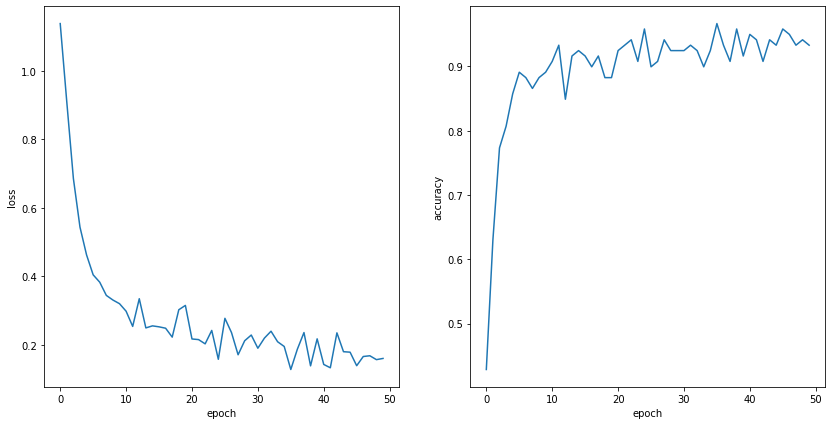

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history1.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history1.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

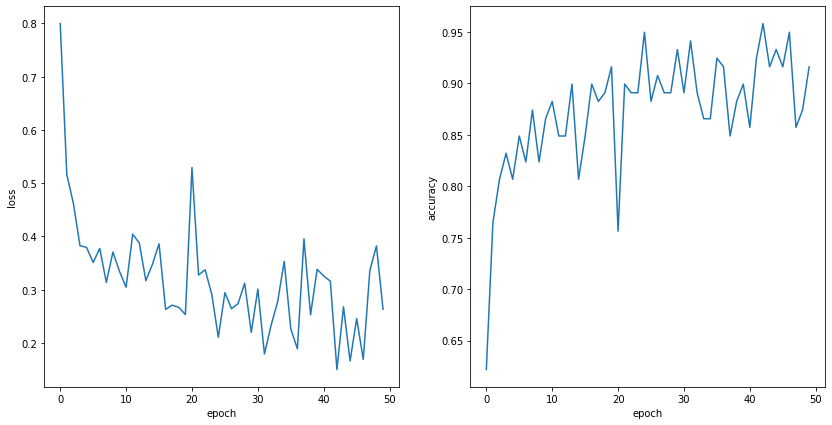

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history2.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history2.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

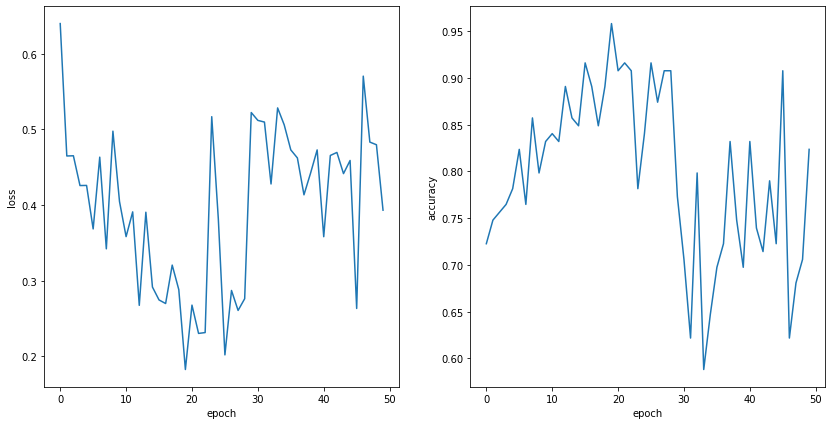

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history3.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history3.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

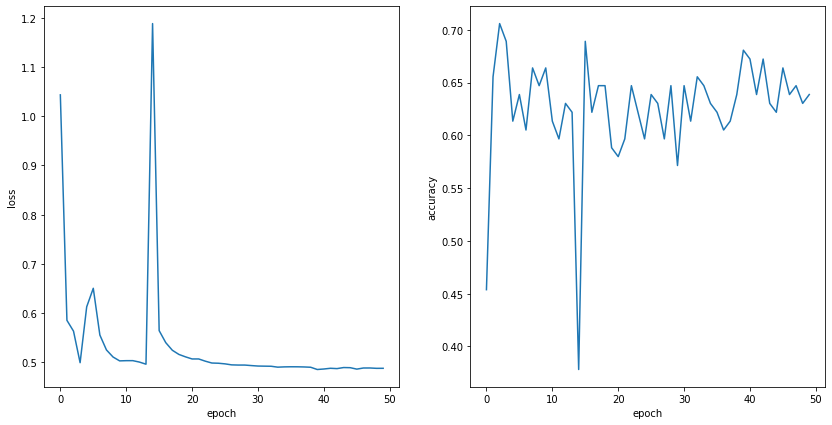

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history4.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history4.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

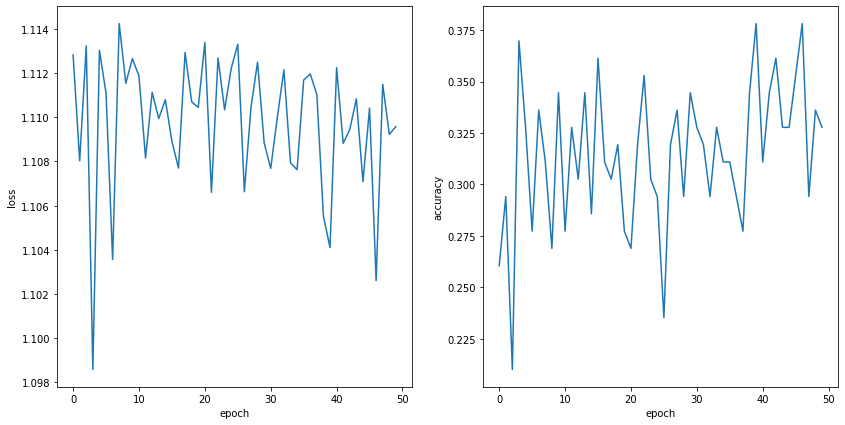

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history5.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history5.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

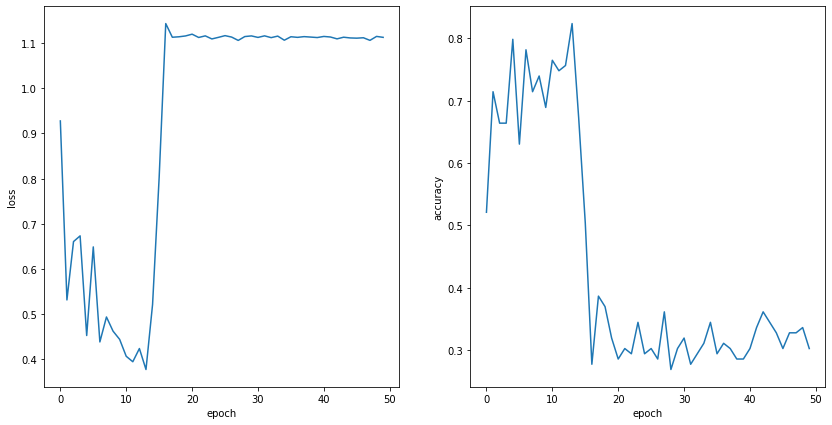

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history6.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history6.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

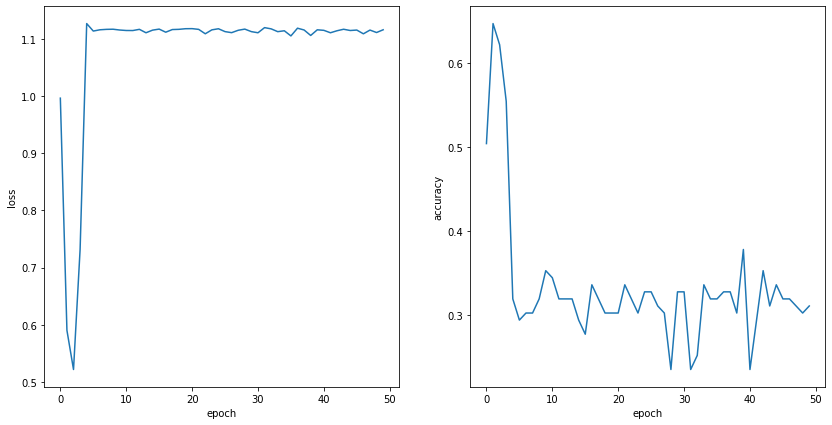

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history7.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history7.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

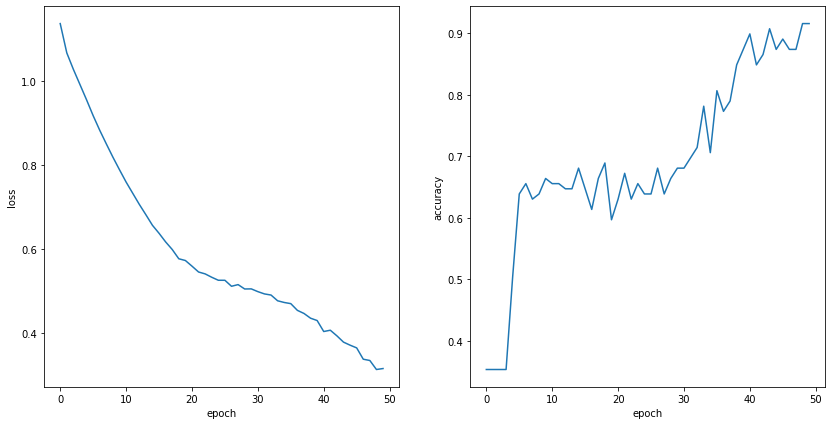

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history8.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history8.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

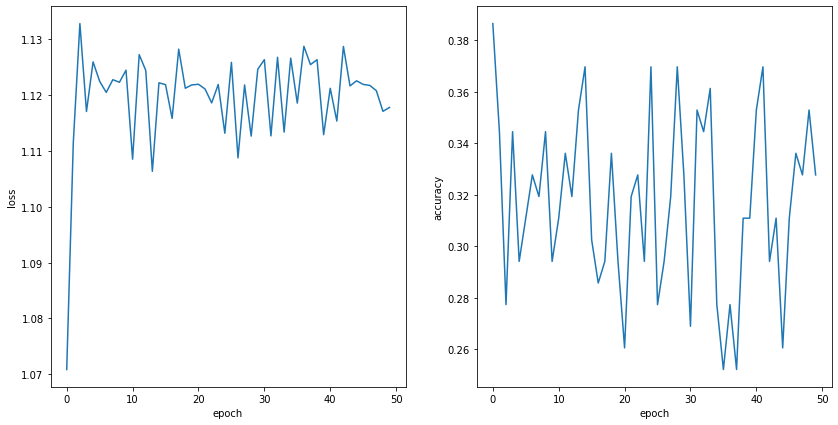

In [ ]:
plt.figure(figsize=(14,7))
plt.title('Loss Curve')
plt.subplot(121)
plt.plot(history9.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(history9.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()